<a href="https://colab.research.google.com/github/ishaanrai-hub/ML-projects/blob/main/Property_price_prediction_model_(ML_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#to libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
#Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [55]:
#Load from Excel file
df = pd.read_excel("Data_file.xlsx")

In [56]:
#Basic EDA
print(df.head())
print("\nSummary:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  

Summary:
           longitude      latitude  housing_median_age   total_ro

In [57]:
# Only select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

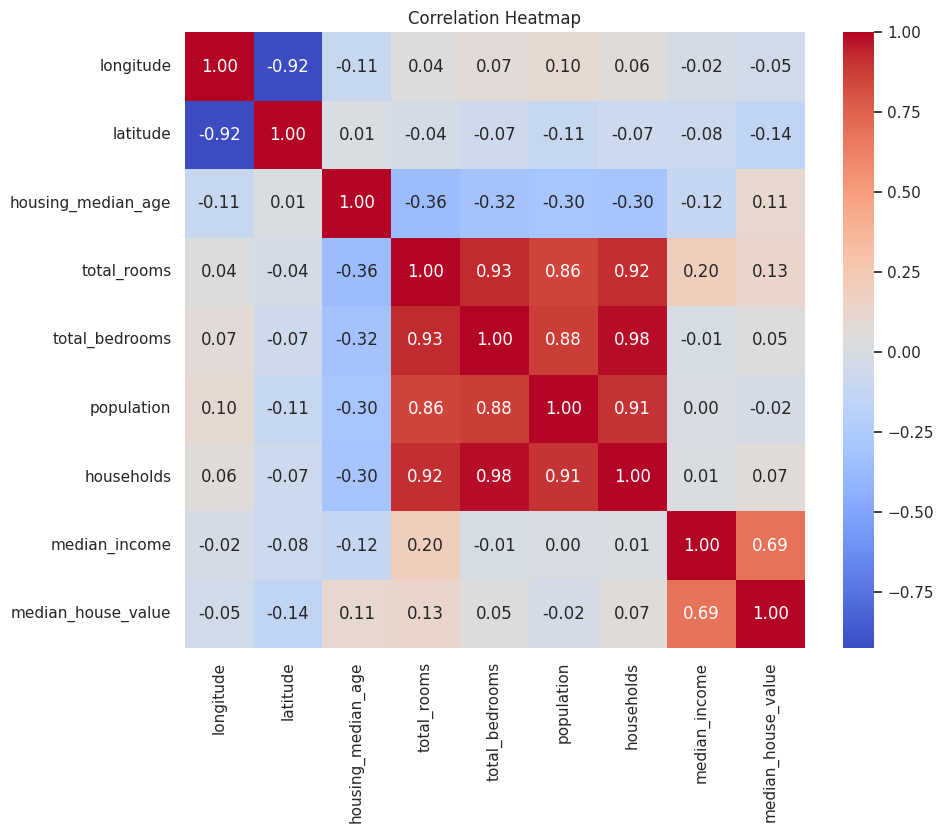

In [58]:
# Now plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

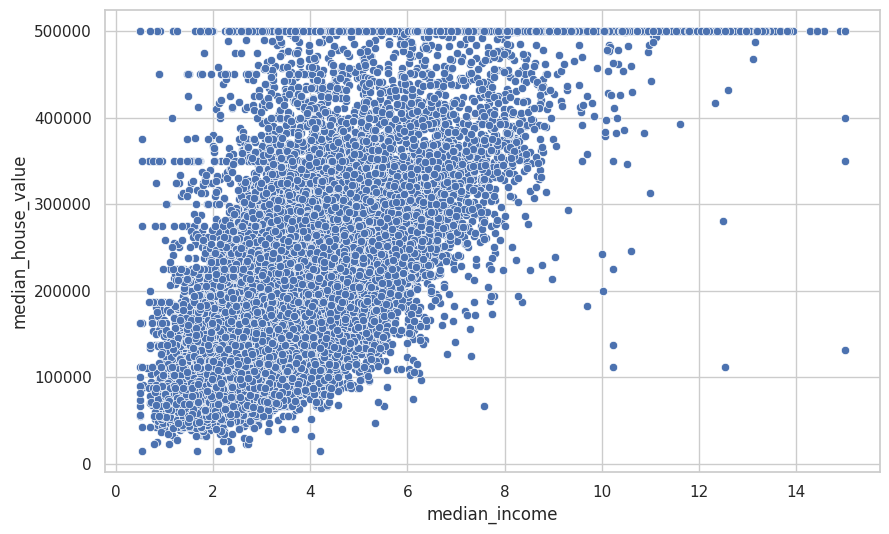

In [59]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)

In [60]:
X_simple = df[["median_house_value"]]
y = df["median_income"]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)
y_pred_s = lr_simple.predict(X_test_s)

In [61]:
print("Simple Linear Regression:")
print("  Coefficient:", lr_simple.coef_[0])
print("  Intercept:", lr_simple.intercept_)
print("  R2 Score:", r2_score(y_test_s, y_pred_s))
print("  RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))

Simple Linear Regression:
  Coefficient: 1.1374885479806013e-05
  Intercept: 1.5239383442177385
  R2 Score: 0.4585200373022251
  RMSE: 1.3843513585570555


In [62]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [69]:
#Multiple Linear Regression
X_multi = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [70]:
print(X_train_m.isnull().sum())  # Count NaNs in training features
print(X_test_m.isnull().sum())   # Count NaNs in test features


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [65]:
# Fill NaNs in train and test with column means from train data
mean_values = X_train_m.mean()

X_train_m = X_train_m.fillna(mean_values)
X_test_m = X_test_m.fillna(mean_values)


In [66]:
print(X_train_m.isnull().sum())  # Count NaNs in training features
print(X_test_m.isnull().sum())   # Count NaNs in test features

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [67]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_m = pd.DataFrame(imputer.fit_transform(X_train_m), columns=X_train_m.columns)
X_test_m = pd.DataFrame(imputer.transform(X_test_m), columns=X_test_m.columns)


In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_m = pd.DataFrame(imputer.fit_transform(X_train_m), columns=X_train_m.columns)
X_test_m = pd.DataFrame(imputer.transform(X_test_m), columns=X_test_m.columns)

y_pred_m = lr_multi.predict(X_test_m)

print(y_pred_m)


[ 64693.82761505 134863.71765324 266127.75820772 ... 439180.9834118
 120797.55240621 183386.04993584]
